## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/Train_clean.csv')

#### Show Top 5 Records

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
X = df.drop(columns=['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [6]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [7]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### Seperating features according to category

In [8]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(8523, 42)

#### Preparing X and Y variables

In [11]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((6818, 42), (1705, 42))

#### Create an Evaluate Function to give all metrics after model Training

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1141.5316
- Mean Absolute Error: 847.2210
- R2 Score: 0.5595
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1069.3653
- Mean Absolute Error: 792.0250
- R2 Score: 0.5793


Lasso
Model performance for Training set
- Root Mean Squared Error: 1141.7271
- Mean Absolute Error: 846.8711
- R2 Score: 0.5593
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1068.5966
- Mean Absolute Error: 791.2891
- R2 Score: 0.5799


Ridge
Model performance for Training set
- Root Mean Squared Error: 1141.5319
- Mean Absolute Error: 847.1955
- R2 Score: 0.5595
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1069.3504
- Mean Absolute Error: 792.0126
- R2 Score: 0.5793


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 997.3467
- Mean Absolute Error: 716.1071
- R2 Sco

### Results

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.593394
1,Lasso,0.579871
2,Ridge,0.579278
0,Linear Regression,0.579266
5,Random Forest Regressor,0.570124
8,AdaBoost Regressor,0.537981
6,XGBRegressor,0.521186
3,K-Neighbors Regressor,0.504640
4,Decision Tree,0.162326


## Linear Regression

In [15]:
cat_model = CatBoostRegressor()
cat_model =cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.055449
0:	learn: 1666.3939449	total: 8.16ms	remaining: 8.15s
1:	learn: 1616.8584939	total: 15ms	remaining: 7.5s
2:	learn: 1572.2976003	total: 22.2ms	remaining: 7.37s
3:	learn: 1530.0117482	total: 29.4ms	remaining: 7.33s
4:	learn: 1491.8938623	total: 38.2ms	remaining: 7.61s
5:	learn: 1456.6165272	total: 43.5ms	remaining: 7.21s
6:	learn: 1422.9685247	total: 47.6ms	remaining: 6.76s
7:	learn: 1393.5011551	total: 53.6ms	remaining: 6.64s
8:	learn: 1369.3738185	total: 58.5ms	remaining: 6.44s
9:	learn: 1343.7893947	total: 62.7ms	remaining: 6.2s
10:	learn: 1320.4155492	total: 68.3ms	remaining: 6.14s
11:	learn: 1300.1550717	total: 72.8ms	remaining: 5.99s
12:	learn: 1279.6554704	total: 77.3ms	remaining: 5.87s
13:	learn: 1261.4524394	total: 83ms	remaining: 5.85s
14:	learn: 1245.8259178	total: 89.3ms	remaining: 5.86s
15:	learn: 1231.3271580	total: 93.9ms	remaining: 5.77s
16:	learn: 1217.7286970	total: 101ms	remaining: 5.83s
17:	learn: 1205.8480211	total: 110ms	remaining: 6s
1

## Plot y_pred and y_test

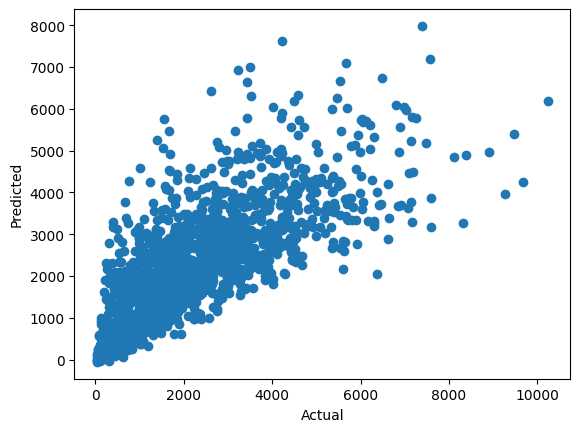

In [16]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

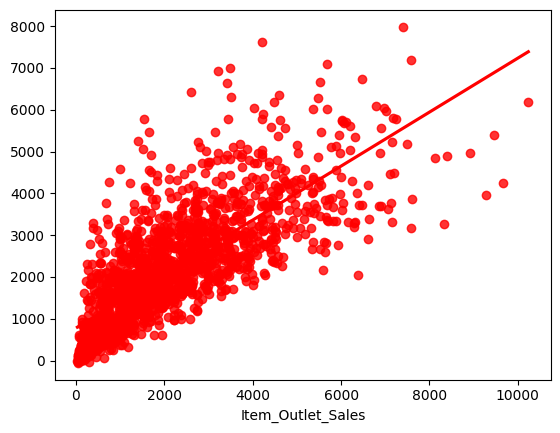

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [18]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
7503,1743.0644,1209.408018,533.656382
2957,356.8688,887.676566,-530.807766
7031,377.5086,722.940545,-345.431945
1084,5778.4782,5114.478850,663.999350
856,2356.9320,3010.247411,-653.315411
...,...,...,...
7205,3004.0896,1952.864460,1051.225140
3257,890.8404,2036.952960,-1146.112560
6346,629.1810,680.142035,-50.961035
6318,253.0040,774.049966,-521.045966
